In [ ]:
import csv
# read the data in 
data = {'gender':[],'ethnicity': [],'parental_education':[],'lunch':[],	'test_preparation':[],
        'math_score':[],'reading_score':[], 'writing_score':[]
}


In [ ]:
l = [1,2,4,5,6]

for i,item in enumerate(l):
    print(i,item)

In [ ]:
with open ("StudentsPerformance.csv",newline='') as f:
    reader = csv.reader(f, delimiter=',')    
    for row in reader:
        for i,key in enumerate(data.keys()):
            data[key].append(row[i])

In [ ]:
# check
data['math_score']

In [ ]:
float('male')

In [ ]:
# remove the first value because it's a header

for key in data.keys():
    data[key] = data[key][1:]
    try:
        float(data[key][0]) # cast the first value and catch the error
    except:
        ...
    else:
        data[key] = [float(x) for x in data[key]]

In [ ]:
#check 
data['gender']
len(data['gender'])

In [ ]:
data2 = {"gender":['female', 'male','female','female','male','male','male','male'], "math_score":[100,85,90,70,65,55,35,25], 'writing_score':[100,85,90,70,65,55,35,25], 'reading_score':[100,85,90,70,65,55,35,25]}
data2

In [ ]:
data['math_score'][2:5]

print(set(data['gender']))

In [ ]:
# create a grouping function

def group(category, data, aggregator = "mean"):
    if category not in data.keys():
        raise ValueError('key not in data')
    else:
        sub_keys = set(data[category]) # set operation to get subkeys
        to_return = {}
        for sub_key in sub_keys:
            temp = {'math_score':[], 'reading_score':[], 'writing_score':[]}.copy()
            for i,value in enumerate(data[category]):
                if value == sub_key: # is it what we're interested in collecting e.g. male/female?
                    # collect the test scores
                    temp['math_score'].append(data['math_score'][i])
                    temp['reading_score'].append(data['reading_score'][i])
                    temp['writing_score'].append(data['writing_score'][i])
            to_return[sub_key] = temp
    temp2 = {}
    # do the aggregation
    for sub_key in sub_keys:        
        for score in temp.keys():
            scores = to_return[sub_key][score]
            # find the mean
            temp2['avg_'+ score] = sum(scores)/len(scores)
            # to_return[sub_key]['avg_'+ score] = sum(scores)/len(scores)
        to_return[sub_key].update(temp2)
    return to_return




In [ ]:
returned = group('gender', data)

In [ ]:
returned['male']['avg_writing_score']

In [ ]:
#small demo on plotting stacked bars
import matplotlib.pyplot as plt
import numpy as np

x =['sith', 'jedi']
bar_locs = [0,1]
math = [80,77]
reading = [78,88]
fig,ax = plt.subplots()
plt.figure(figsize = (10,6))
ax.bar(bar_locs,math, color = 'r', label = 'math scores')
ax.bar(bar_locs, reading,color = 'b', bottom=math, label = 'reading scores')
ax.legend()
ax.set(ylabel='avg score', xlabel='force type', xticks=bar_locs, xticklabels=x)

# Group exercise
Write a function that plots  the data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_data(data_dict: dict, category_name: str, plot_type: str = 'bar'):
    """
    Plots test score data for a specified category using various plot types.
    
    Parameters:
    -----------
    data_dict : dict
        A dictionary containing grouped data, where each key represents a sub category (e.g., "parental_education"),
        and each value is a dictionary holding test scores and their averages for each subject.
        
    category_name : str
        The name of the category to be displayed on the x-axis (e.g., "Parental Education Level").
    
    plot_type : str, optional
        The type of plot to generate. Options include:
        - 'bar': A grouped bar chart comparing average scores across categories.
        - 'stacked': A stacked bar chart displaying cumulative average scores for each category.
        - 'line': A line plot connecting average scores across categories.
        Default is 'bar'.
        
    Returns:
    --------
    None
        Displays the selected plot type with each category on the x-axis and scores based on the specified type.
    """
    # implement function 
    
    # first, let's get the subcategories: these will be our x-tick labels
    # remember, the group function returns the data in a dictionary...
    # ...where each of the subcategories has the average scores for each of the tests
    x_ticks = list(data_dict.keys())  # this will produce e.g. ['male, 'female'] for gender, and ['completed','none'] for lunch
    
    # second: let's determine the xlocations (i.e. where we will place the bars if bar plot is requested)
    bar_width = 0.25
    
    # because we have 3 bars for each category, we have 3 positions
    bar_pos1 = np.array(range(len(x_ticks)))
    bar_pos2 = bar_pos1 + bar_width
    bar_pos3 = bar_pos1 - bar_width
    fig,ax = plt.subplots(figsize = (10,6))
    # collect the bar heights
    
    # these are the averages for each test. We need all the math scores in one list, all the... 
    #...writing scores in another list etc
    
    math_averages = []
    writing_averages = []
    reading_averages = []
    
    for sub_category in x_ticks:
        math_averages.append(data_dict[sub_category]['avg_math_score'])
        writing_averages.append(data_dict[sub_category]['avg_writing_score'])
        reading_averages.append(data_dict[sub_category]['avg_reading_score'])
    
    # Plot
    # Here we need to plot the type of plot requested by the user and label it appropriately
    if plot_type == "bar":
        ax.bar(bar_pos1, math_averages, label = "math", color = 'r',width=bar_width)
        ax.bar(bar_pos2, writing_averages, label="writing", color = 'g',width=bar_width)
        ax.bar(bar_pos3, reading_averages, label = 'reading', color = 'b',width=bar_width)
        ax.set(xticks=bar_pos1, xticklabels=x_ticks, xlabel=category_name, ylabel='average grades', title=f'Average test scores by {category_name}')
        ax.set_xticklabels(labels=x_ticks, rotation = 45)  
        ax.legend(loc = 1)
        plt.tight_layout()
        plt.show()
    elif plot_type == "stacked":
        ax.bar(bar_pos1,math_averages, label = 'math', color = 'r')
        ax.bar(bar_pos1, writing_averages,label='writing', color = 'g',bottom=math_averages)
        ax.bar(bar_pos1,reading_averages, label = 'reading', color = 'b',bottom = [m + w for m,w in zip(math_averages,writing_averages)])
        ax.set(xticks=bar_pos1, xticklabels=x_ticks, xlabel=category_name, ylabel='Cumulative scores', title=f'Cumulative test scores by {category_name}')
        ax.set_xticklabels(labels=x_ticks, rotation = 45)  
        ax.legend(loc = 1)
        plt.tight_layout()
        plt.show()   
    elif plot_type == "line":
        ax.plot(x_ticks,math_averages, label = 'math', color = 'r', marker = 'H')  
        ax.plot(x_ticks, writing_averages,label='writing', color = 'g', marker = '*')
        ax.plot(x_ticks, reading_averages, label = 'reading', color = 'b', marker = 'o')
        ax.set(xlabel=category_name, ylabel='Average scores', title=f'Average test scores by {category_name}')
        ax.set_xticks(x_ticks, labels=x_ticks, rotation = 45)
        ax.legend(loc = 1)
        plt.tight_layout()
        plt.show()    
    else:
        raise ValueError("invalid plot type. only bar, stacked and line are supported")

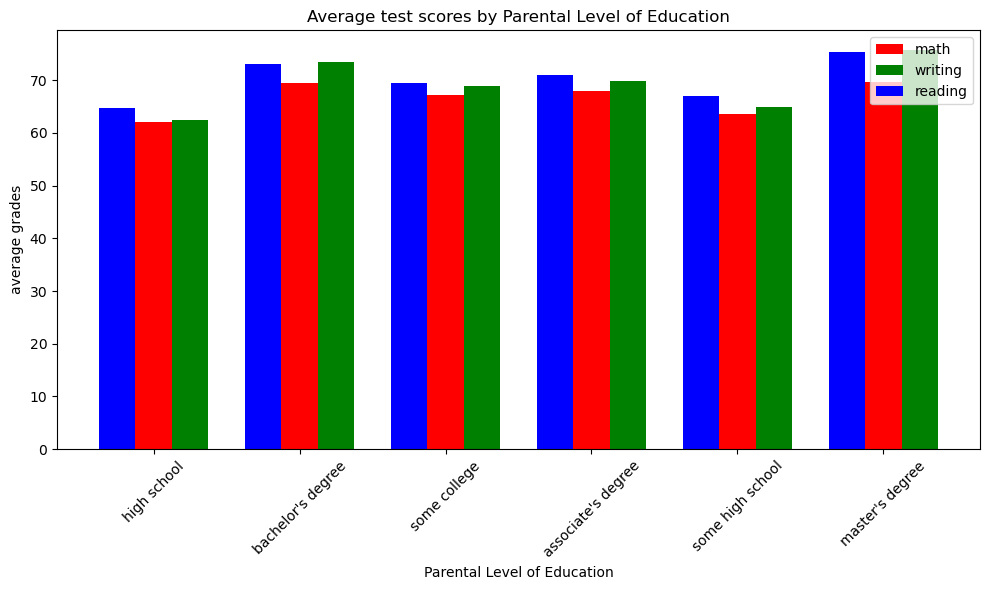

In [57]:
returned = group(category='parental_education', data=data)
plot_data(data_dict=returned, category_name='Parental Level of Education', plot_type='bar')

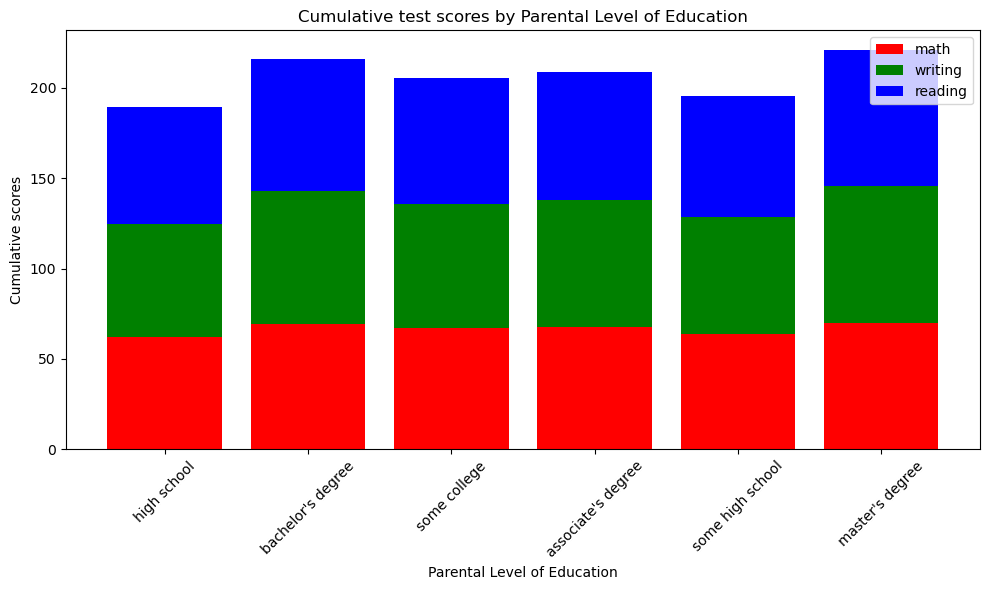

In [58]:
# nested function call
plot_data(group('parental_education', data=data), category_name='Parental Level of Education', plot_type='stacked')

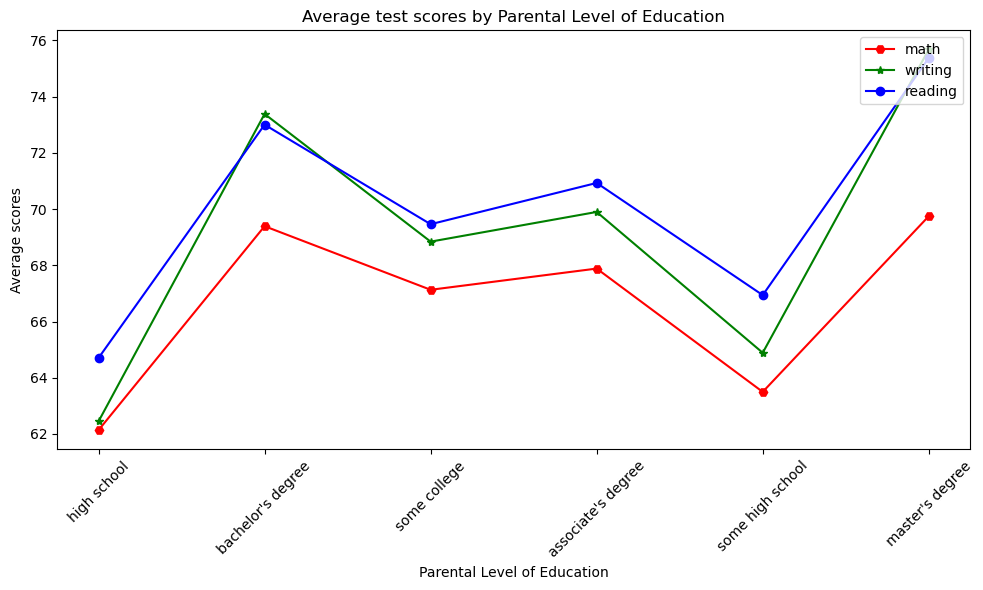

In [59]:

plot_data(group('parental_education', data=data), category_name='Parental Level of Education', plot_type='line')